# 1. Conexión API

In [95]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import folium


#enviorement: nosql3.8

api_key="cfb0e81f9edc5ff91586f4672ba286fb"

# base_url=f"https://api.openweathermap.org/data/2.5/weather?q=Madrid&units=metric&appid={api_key}"

# response=(requests.get(base_url, params={"api_key":api_key})).json()

base_url=f"https://api.openweathermap.org/data/2.5/weather?q=Sudafrica&units=metric"

response1=(requests.get(base_url, params={"appid":api_key})).json()

df=pd.json_normalize(response1)

df.head()

,weather,base,visibility,dt,timezone,id,name,cod,coord.lon,coord.lat,...,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,sys.country,sys.sunrise,sys.sunset
0,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,10000,1764579894,7200,953987,Republic of South Africa,200,26,-30,...,21,1013,851,1.77,306,2.32,4,ZA,1764558452,1764608576


City name

Temperature (°C)

Humidity (%)

Wind speed (m/s or km/h)

Weather description (e.g., “clear sky”)

In [2]:
requests=df[['name','main.temp', 'main.humidity','wind.speed', 'sys.sunrise']]
requests

,name,main.temp,main.humidity,wind.speed,sys.sunrise
0,Republic of South Africa,21.52,26,2.51,1764558452


# 2. Recopilación de datos y 3. Limpieza de datos

Crea una lista de al menos 20 ciudades de diferentes continentes.

Utilice un bucle de Python para solicitar datos de cada ciudad y almacenar los resultados.

Construya un DataFrame de pandas con una fila por ciudad.

In [87]:
paises_por_continente = [
    "Egipto",
    "Nigeria",
    "Sudafrica",
    "Canadá",
    "Brasil",
    "México",
    "Argentina",
    "Japon",
    "India",
    "China",
    "Tailandia",
    "Francia",
    "Alemania",
    "España",
    "Colombia",
    "Francia",
    "Francia",
    "Islandia",
    "Rusia",
    "Peru"
]

resultado=[]

for i in paises_por_continente:

    base_urli=f"https://api.openweathermap.org/data/2.5/weather?q={i}&units=metric"

    response=(requests.get(base_urli, params={"appid":api_key})).json()

    print(response)

    df_fila=pd.json_normalize(response)

    df_fila=df_fila[['name','main.temp', 'main.humidity','wind.speed', 'sys.sunrise']]

    resultado.append(df_fila)

df_final=pd.concat(resultado, ignore_index=True)
df_final

{'coord': {'lon': 30, 'lat': 27}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 17.65, 'feels_like': 16.88, 'temp_min': 17.65, 'temp_max': 17.65, 'pressure': 1020, 'humidity': 54, 'sea_level': 1020, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 6.06, 'deg': 17, 'gust': 7.76}, 'clouds': {'all': 100}, 'dt': 1764579223, 'sys': {'country': 'EG', 'sunrise': 1764563532, 'sunset': 1764601575}, 'timezone': 7200, 'id': 357994, 'name': 'Egypt', 'cod': 200}
{'coord': {'lon': 8, 'lat': 10}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 29.46, 'feels_like': 27.76, 'temp_min': 29.46, 'temp_max': 29.46, 'pressure': 1010, 'humidity': 18, 'sea_level': 1010, 'grnd_level': 926}, 'visibility': 10000, 'wind': {'speed': 4.76, 'deg': 66, 'gust': 7.62}, 'clouds': {'all': 13}, 'dt': 1764579180, 'sys': {'country': 'NG', 'sunrise': 1764566

,name,main.temp,main.humidity,wind.speed,sys.sunrise
0,Egypt,17.65,54,6.06,1764563532
1,Nigeria,29.46,18,4.76,1764566988
2,Republic of South Africa,23.52,21,1.77,1764558452
3,Canadá,21.49,87,1.49,1764576440
4,Brazil,20.63,96,1.03,1764580167
5,Mexico City,12.75,50,0.79,1764593676
6,Argentina,15.33,97,2.31,1764579483
7,Japan,17.70,63,1.70,1764538331
8,Innichen,-7.00,100,0.51,1764570907
9,China,11.86,64,5.81,1764594408


In [32]:
df_final.to_csv('PaisesTempetaura.csv')

In [33]:
df_final=pd.read_csv("/home/sebas/Weather-Data-Analysis-with-a-public-API/Api/PaisesTempetaura.csv")

In [34]:
df_final=df_final.drop(columns='Unnamed: 0')


In [35]:
df_final.columns

Index(['name', 'main.temp', 'main.humidity', 'wind.speed', 'sys.sunrise'], dtype='object')

In [36]:
df_final.head()

,name,main.temp,main.humidity,wind.speed,sys.sunrise
0,Egypt,18.55,36,3.57,1764131306
1,Nigeria,34.14,16,4.20,1764134843
2,Republic of South Africa,28.38,17,3.03,1764126491
3,Canadá,32.11,43,1.93,1764144388
4,Brazil,31.06,59,1.25,1764148105


# 4. Data Analysis

Answer questions such as:
Which cities are the hottest and coldest right now?


In [37]:
max=df_final["name"][df_final["main.temp"] == df_final["main.temp"].max()] ## hay que hacer un .item() para coger solo para un elemento
min=df_final["name"][df_final["main.temp"] == df_final["main.temp"].min()]


In [38]:
print(f'El pais mas caliente que es: {max.item()} y el pais mas frio es: {min.item()}')

El pais mas caliente que es: Nigeria y el pais mas frio es: Russia


Is there a relationship between temperature and humidity?

In [39]:
## Acordarse si se usa f "" al usar los valores dentro se usa ' '
print(f"La relacion que hay que hay entre temperatura y humedad es {abs(df_final['main.temp'].corr(df_final['main.humidity']).round(4))}")

La relacion que hay que hay entre temperatura y humedad es 0.6582


Which continent seems to have the windiest cities?

In [40]:
paises_africa = [
    "Egipto",
    "Nigeria",
    "Sudafrica"
]

paises_america = [
    "Canadá",
    "México",
    "Colombia",
    "Peru",
    "Brasil",
    "Argentina"
]

paises_asia = [
    "Japon",
    "India",
    "China",
    "Tailandia"
]

paises_europa = [
    "Francia",
    "Alemania",
    "España",
    "Bielorrusia",
    "Islandia"
    ]

total=[paises_africa,paises_america,paises_asia,paises_europa]

resultadoTotal=[]
for paises in total:

    df1= df_final[df_final['name'].isin(paises)]
    max_aire=df1["name"][df1["wind.speed"] == df1["wind.speed"].max()]
    resultadoTotal.append(max_aire.item())

print(f'Los paises con más viento son: {resultadoTotal[0]}, {resultadoTotal[1]}, {resultadoTotal[2]} y {resultadoTotal[3]}')

Los paises con más viento son: Nigeria, Peru, China y Islandia


What’s the most common weather description (e.g., clear, cloudy, rainy)?

In [42]:
df_final.columns

Index(['name', 'main.temp', 'main.humidity', 'wind.speed', 'sys.sunrise'], dtype='object')

In [23]:
# final=df_final.groupby('sys.sunrise')['name']
final=df_final.groupby('name')['main.temp']
# final
print(final)

In [43]:
rango = [-25,-15,0,10,20,30,40]
etiqueta= ["<-25", "-25/-10", "0-10", "10-20", "20-30", ">30"]

df_final['rango.temperatura'] = pd.cut(
    df_final['main.temp'],
    bins=rango,
    labels=etiqueta,
    right=False
)

df_final['rango.temperatura'].value_counts()

rango.temperatura
20-30      6
10-20      5
>30        4
0-10       3
-25/-10    1
<-25       1
Name: count, dtype: int64

In [ ]:
print(f'La el rango de temperatura mas comun es: {df_final['rango.temperatura'].value_counts().index[0]}')

La el rango de temperatura mas comun es: 20-30


Example 1: Bar chart of average temperature by continent.

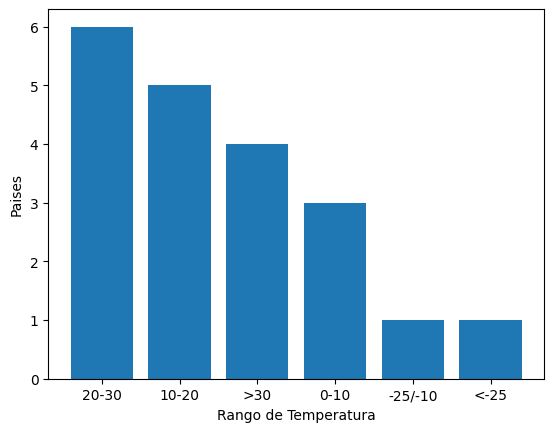

In [44]:
varianza = df_final["rango.temperatura"].value_counts()
plt.bar(varianza.index, varianza.values)
plt.xlabel("Rango de Temperatura")
plt.ylabel("Paises")
plt.show()

Example 2: Scatter plot of temperature vs humidity.

In [24]:
df_final.columns

Index(['name', 'main.temp', 'main.humidity', 'wind.speed', 'sys.sunrise'], dtype='object')

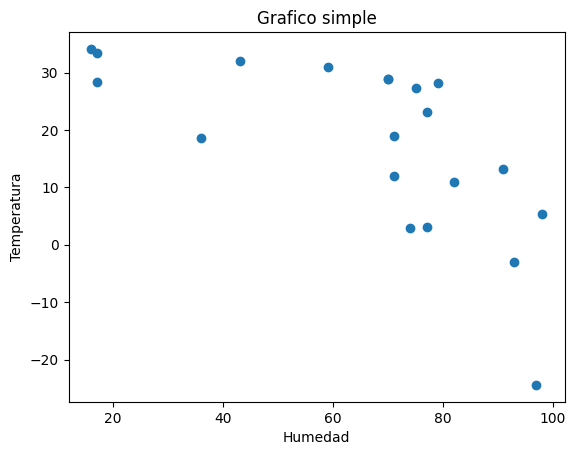

In [28]:
x=df_final["main.humidity"]
y=df_final["main.temp"]

plt.scatter(x,y)
plt.xlabel("Humedad")
plt.ylabel("Temperatura")
plt.title("Grafico simple")
plt.show()



# 6. Resumen

Escriba un informe breve (celda Markdown):

Describe tu proceso (solicitudes de API, limpieza de datos, análisis).

La parte mas complicada es a la hora de hacer un dataframe con los valores de diferentes paises, no entiendo porque me da error la hora de pasar el param apikey dentro de la url de la solicutd de la api.
Despues de un tiempo me da el resultado. tuve que descargar el csv y cargarlo para hacer el ejercicio.
No es la primera vez que a la hora de pasar un dataframe para un csv a la hora de descargar cree una columna: Unnamed: 0, la que se debe de borrar 

Resalte patrones interesantes.

Hay cierta relacio(no mucha) entre la humedad y la temperatura un -0.65, esto indica que a medida que una variable aumenta la otra va disminuyendo pero no tan drastico, como una correlacion de un -1.

Mencione cualquier dificultad o limitación que haya encontrado.

La mayor dificultad fue a la hora de tratar los paises segun los continentes, no supe muy bien se habi que hacer 2 for para iterar, uno sobre los diferentes array de los continentes y otro for para iterar sobre cada lista del array.
Buscando vi la el metrodo isin() df1= df_final[df_final['name'].isin(paises)] que ya hace esta iteracion de existencia dentro del array


# Bonus:
Compare los datos actuales con los pronosticados .

In [89]:
base_url_hora=f"https://api.openweathermap.org/data/2.5/forecast/hourly?q=Egipto&units=metric"

response2=(requests.get(base_url_hora, params={"appid":api_key})).json()

df_hora=pd.json_normalize(response2)

# print(df_hora.message[0])

df_hora.head()


,cod,message
0,401,Invalid API key. Please see https://openweathe...


In [96]:
paises_por_continente = [
    "Egipto",
    "Nigeria",
    "Sudafrica",
    "Canadá",
    "Brasil",
    "México",
    "Argentina",
    "Japon",
    "India",
    "China",
    "Tailandia",
    "Francia",
    "Alemania",
    "España",
    "Colombia",
    "Francia",
    "Francia",
    "Islandia",
    "Rusia",
    "Peru"
]
resultado2=[]

for i in paises_por_continente:

    base_url_hora=f"https://api.openweathermap.org/data/2.5/weather?q={i}&units=metric"

    response2=(requests.get(base_url_hora, params={"appid":api_key})).json()

    print(response2)

    df_fila=pd.json_normalize(response2)

    df_fila=df_fila[['name','coord.lon','coord.lat']]

    resultado2.append(df_fila)

df_final2=pd.concat(resultado2, ignore_index=True)
df_final2

{'coord': {'lon': 30, 'lat': 27}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 17.65, 'feels_like': 16.88, 'temp_min': 17.65, 'temp_max': 17.65, 'pressure': 1020, 'humidity': 54, 'sea_level': 1020, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 6.06, 'deg': 17, 'gust': 7.76}, 'clouds': {'all': 100}, 'dt': 1764579223, 'sys': {'country': 'EG', 'sunrise': 1764563532, 'sunset': 1764601575}, 'timezone': 7200, 'id': 357994, 'name': 'Egypt', 'cod': 200}
{'coord': {'lon': 8, 'lat': 10}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 29.46, 'feels_like': 27.76, 'temp_min': 29.46, 'temp_max': 29.46, 'pressure': 1010, 'humidity': 18, 'sea_level': 1010, 'grnd_level': 926}, 'visibility': 10000, 'wind': {'speed': 4.76, 'deg': 66, 'gust': 7.62}, 'clouds': {'all': 13}, 'dt': 1764579180, 'sys': {'country': 'NG', 'sunrise': 1764566

,name,coord.lon,coord.lat
0,Egypt,30.0000,27.0000
1,Nigeria,8.0000,10.0000
2,Republic of South Africa,26.0000,-30.0000
3,Canadá,-40.4333,-12.2833
4,Brazil,-55.0000,-10.0000
5,Mexico City,-99.1277,19.4285
6,Argentina,-64.0000,-34.0000
7,Japan,139.7531,35.6854
8,Innichen,12.2797,46.7406
9,China,-99.2333,25.7000


In [105]:
# df_final2 
mapa = folium.Map(location=[df_final2['coord.lat'].mean(), df_final2['coord.lon'].mean()])

for index, fila in df_final2.iterrows():
    folium.Marker(
        location=[fila['coord.lat'], fila['coord.lon']],
        tooltip=fila['name']
                  ).add_to(mapa)

mapa

